<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/02.Week_2_Classification_CovertDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Pytorch dan Tensorflow**

In [166]:
# !pip install tensorflow
# !pip install torch torchvision

## **Import Library**

In [167]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## **DATA EXPLORING**

In [168]:
df = pd.read_csv('compressed_data.csv.gz')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [170]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,0.238164,0.066550,-0.619374,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.055988,0.074904,0.082687,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,0.055726,0.122028,-0.100433,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,-0.008709,0.146839,0.077792,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.200411,-0.232933,-0.270349,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.006181,-0.100565,-0.200282,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,0.042392,0.048646,-0.195733,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,0.034707,0.090757,0.018860,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,0.027473,-0.277510,-0.236548,-0.108936


In [171]:
df.duplicated().sum()

0

In [172]:
df.isna().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


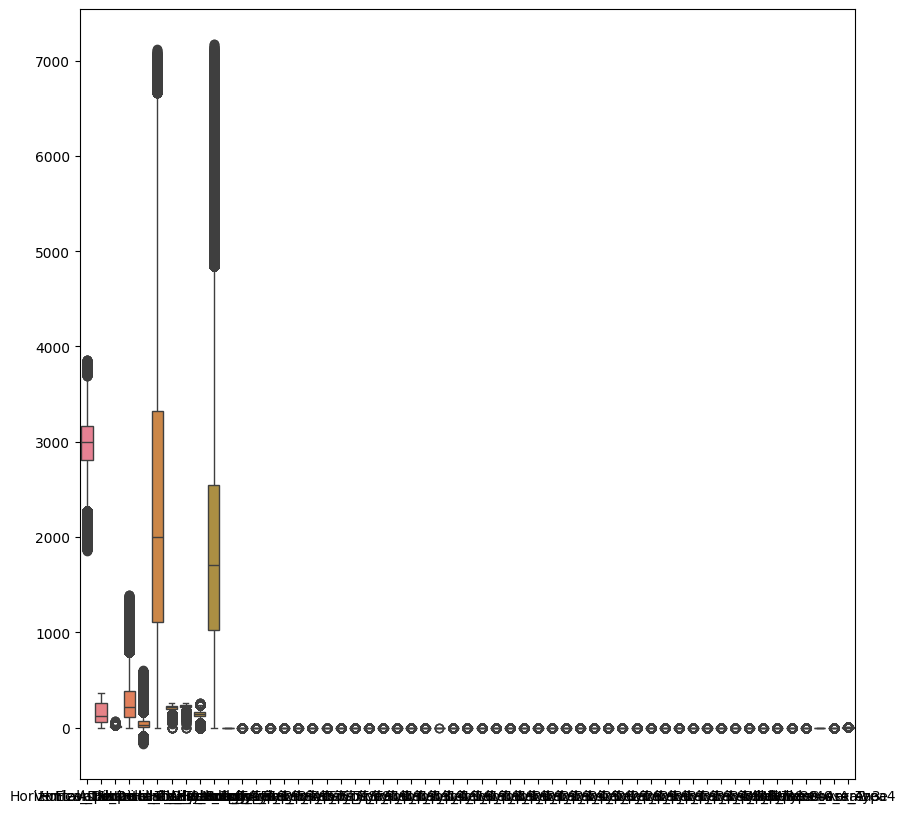

In [173]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()

## **Data Preparation**

In [174]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [175]:
Counter(y)

Counter({5: 9493, 2: 283301, 1: 211840, 7: 20510, 3: 35754, 6: 17367, 4: 2747})

In [176]:
undersample = RandomUnderSampler(sampling_strategy={1: 30000, 2: 30000, 3: 30000})
X_under, y_under = undersample.fit_resample(X, y)

oversample = SMOTE(sampling_strategy={4: 30000, 5: 30000, 6: 30000, 7: 30000})
X_resampled, y_resampled = oversample.fit_resample(X_under, y_under)

Counter(y_resampled)

Counter({1: 30000, 2: 30000, 3: 30000, 4: 30000, 5: 30000, 6: 30000, 7: 30000})

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [195]:
y_train = y_train - 1
y_test = y_test - 1

In [196]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
y_scaler = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [198]:
X_train.shape

(168000, 54)

In [199]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

## **Tensorflow Model**

In [183]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [184]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
)
model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split= 0.15, callbacks=[early_stopping])

Epoch 1/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9725 - val_loss: 0.5498
Epoch 2/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5261 - val_loss: 0.4840
Epoch 3/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4698 - val_loss: 0.4515
Epoch 4/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4317 - val_loss: 0.4093
Epoch 5/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4035 - val_loss: 0.3956
Epoch 6/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3840 - val_loss: 0.3961
Epoch 7/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3663 - val_loss: 0.3719
Epoch 8/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3420 - val_loss: 0.3458
Epoch 9/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3316 - val_loss: 0.3375
Epoch 10/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3203 - val_loss: 0.3228
Epoch 11/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3115 - val_loss: 0.3142
Epoch 12/100
558/558 ━━━━━━━━━━━━━━━━━━━━

In [185]:
y_test.min(), y_test.max()

(0, 6)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.9200
Precision: 0.9191
Recall: 0.9200
F1-score: 0.9192
ROC AUC: 0.9932


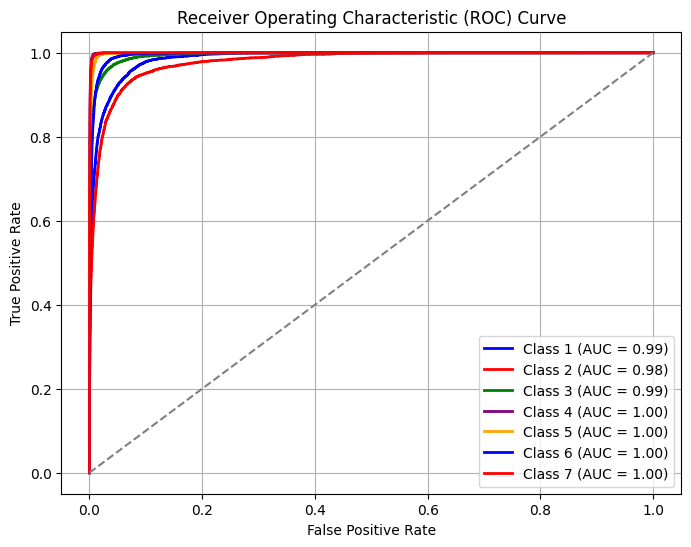

In [186]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_pred = y_pred + 1
y_test = y_test + 1

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

num_classes = y_pred_probs.shape[1]
y_test_bin = label_binarize(y_test, classes=np.arange(1, num_classes + 1))

# ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# Tambahkan garis diagonal sebagai baseline
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## **Pytorch Model**

In [200]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)  # Untuk klasifikasi pakai long
y_test_torch = torch.tensor(y_test, dtype=torch.long)

In [201]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, num_classes)  # Output sesuai jumlah kelas

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # Tanpa softmax karena CrossEntropyLoss sudah include softmax
        return x

In [202]:
num_classes = len(np.unique(y_train))  # Hitung jumlah kelas unik setelah normalisasi
model = SimpleNN(X_train.shape[1], num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [203]:
# Early Stopping Parameters
best_val_loss = float("inf")
patience = 5
patience_counter = 0

# Training Loop dengan Early Stopping
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch)

    # Early Stopping Logic
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

# Load best model
model.load_state_dict(best_model_state)

print("PyTorch model training complete!")

Epoch 0, Training Loss: 1.9569015502929688, Validation Loss: 1.9524993896484375
Epoch 10, Training Loss: 1.9243991374969482, Validation Loss: 1.9200031757354736
Epoch 20, Training Loss: 1.8789420127868652, Validation Loss: 1.872841477394104
Epoch 30, Training Loss: 1.7995176315307617, Validation Loss: 1.7899945974349976
Epoch 40, Training Loss: 1.6677616834640503, Validation Loss: 1.653278112411499
Epoch 50, Training Loss: 1.4840503931045532, Validation Loss: 1.4671902656555176
Epoch 60, Training Loss: 1.2909010648727417, Validation Loss: 1.2763639688491821
Epoch 70, Training Loss: 1.1297158002853394, Validation Loss: 1.1193580627441406
Epoch 80, Training Loss: 1.0125482082366943, Validation Loss: 1.0064263343811035
Epoch 90, Training Loss: 0.9371496438980103, Validation Loss: 0.9340991377830505
Epoch 100, Training Loss: 0.889870285987854, Validation Loss: 0.8881286382675171
Epoch 110, Training Loss: 0.8566177487373352, Validation Loss: 0.8553981781005859
Epoch 120, Training Loss: 0.83

In [204]:
y_test_torch.min(), y_test_torch.max()

(tensor(0), tensor(6))

In [205]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6])

Accuracy: 0.8076
Precision: 0.8044
Recall: 0.8076
F1-score: 0.8049
AUC: 0.9748


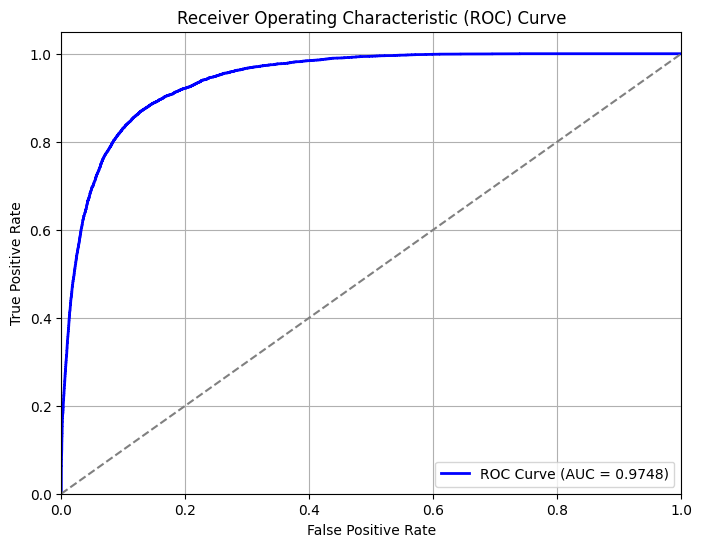

In [206]:
import torch.nn.functional as F

model.eval()

with torch.no_grad():
    logits = model(X_test_torch).cpu().numpy()  # Output model dalam bentuk logit

if num_classes > 2:
    y_pred_probs = F.softmax(torch.tensor(logits), dim=1).numpy()  # Softmax untuk multi-class
    y_pred = np.argmax(y_pred_probs, axis=1)  # Prediksi label tertinggi
else:
    y_pred_probs = torch.sigmoid(torch.tensor(logits)).numpy()  # Sigmoid untuk biner
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Batas 0.5 untuk biner

# Pastikan y_test berbentuk array 1D
y_test = y_test.flatten()

# Evaluasi Model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')  # Pastikan pakai probabilitas

# Print hasil evaluasi
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Hitung ROC Curve
if num_classes == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
else:
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1], pos_label=1)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## **Persamaan Matematika Digunakan**

### **1. Accuracy**

Akurasi ini digunakan untuk mengukur seberapa besar porsi prediksi yang benar terhadap keseluruhan sampelnya.

Bentuk persamaannya :

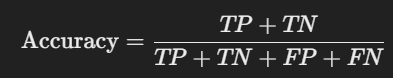


*   TP (True Positive): Prediksi positif yang benar
*   TN (True Negative): Prediksi negatif yang benar
*   FP (False Positive): Prediksi positif yang salah
*   FN (False Negative): Prediksi negatif yang salah

### **2. Precision**

Presisi ini mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif.

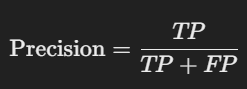

Maka, nilai presisi ini berguna untuk :


*   Nilai presisi tinggi berarti model jarang membuat kesalahan dengan mengklasifikasikan negatif sebagai positif (false positives).
*   Berguna saat false positive memiliki dampak besar





### **Recall**

Recall mengukur seberapa baik model menangkap semua kasus positif yang sebenarnya

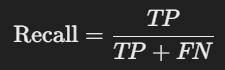

Dengan adanya recall, ini berarti model jarang melewatkan kelas positif yang sebenarnya (false negatives rendah).




### **F1-Score**

F1-score adalah rata-rata harmonik antara Presisi dan Recall.

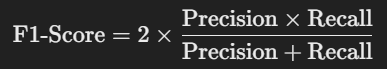

*   F1-Score ini berguna ketika dataset tidak seimbang (misalnya jumlah sampel positif jauh lebih sedikit dari negatif).
*   Nilai F1-score tinggi berarti keseimbangan presisi dan recall yang baik.
*   Salah satu cara untuk menyeimbangkan presisi dan recall adalah dengan F1-Score

**Jika F1-Score tinggi, berarti model memiliki keseimbangan presisi dan recall yang baik!**

### **AUC**

AUC adalah luas di bawah kurva ROC, yang mengukur kemampuan model untuk membedakan antara kelas positif dan negatif.

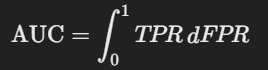


*   AUC = 1.0 → Model sempurna
*   AUC = 0.5 → Model seburuk tebakan acak
*   AUC < 0.5 → Model lebih buruk dari tebakan acak

### **ROC Curve**

ROC kurva yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai threshold.

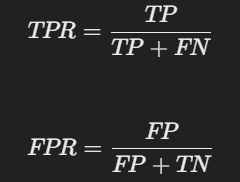

Kurva ROC menggambarkan trade-off antara Recall (TPR) dan False Positives (FPR)